<a href="https://colab.research.google.com/github/drshaymac/Online-Retail-Data-Exploration/blob/main/Online_Retail_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Projects/Online_retail_dataset/OnlineRetail.csv', encoding='latin1')

In [4]:
data = data[data['Country'] != "United Kingdom"].reset_index(drop=True)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46431 entries, 0 to 46430
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    46431 non-null  object 
 1   StockCode    46431 non-null  object 
 2   Description  46431 non-null  object 
 3   Quantity     46431 non-null  int64  
 4   InvoiceDate  46431 non-null  object 
 5   UnitPrice    46431 non-null  float64
 6   CustomerID   44951 non-null  float64
 7   Country      46431 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.8+ MB


## Check for Negative Values Across Numerical Columns



In [6]:
numerical_cols = data.select_dtypes(include=np.number)

print("Checking for negative values in numerical columns:")
for col in numerical_cols.columns:
    negative_values_count = (numerical_cols[col] < 0).sum()
    if negative_values_count > 0:
        print(f"  Column '{col}': {negative_values_count} negative values found.")
    else:
        print(f"  Column '{col}': No negative values found.")

Checking for negative values in numerical columns:
  Column 'Quantity': 1432 negative values found.
  Column 'UnitPrice': No negative values found.
  Column 'CustomerID': No negative values found.


In [9]:
returns = data[data['Quantity'] < 0]
returns.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
145,C536548,22244,3 HOOK HANGER MAGIC GARDEN,-4,12/1/2010 14:33,1.95,12472.0,Germany
146,C536548,22242,5 HOOK HANGER MAGIC TOADSTOOL,-5,12/1/2010 14:33,1.65,12472.0,Germany
147,C536548,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-1,12/1/2010 14:33,2.95,12472.0,Germany
148,C536548,22892,SET OF SALT AND PEPPER TOADSTOOLS,-7,12/1/2010 14:33,1.25,12472.0,Germany
149,C536548,22654,DELUXE SEWING KIT,-1,12/1/2010 14:33,5.95,12472.0,Germany


In [ ]:
print("Counting null values per column:")
print(data.isnull().sum())

Counting null values per column:
InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1480
Country           0
dtype: int64


In [12]:
null_values_df = data[data['CustomerID'].isnull()]
print("DataFrame for null values:")
print(null_values_df.head())

DataFrame for null values:
    InvoiceNo StockCode                         Description  Quantity  \
197    536885     21832                CHOCOLATE CALCULATOR        24   
198    536885     21523  DOORMAT FANCY FONT HOME SWEET HOME        10   
199    536885     48184               DOORMAT ENGLISH ROSE         10   
200    536885     22837          HOT WATER BOTTLE BABUSHKA         24   
201    536885     22632           HAND WARMER RED RETROSPOT        12   

         InvoiceDate  UnitPrice  CustomerID Country  
197  12/3/2010 11:42       1.65         NaN    EIRE  
198  12/3/2010 11:42       6.75         NaN    EIRE  
199  12/3/2010 11:42       6.75         NaN    EIRE  
200  12/3/2010 11:42       4.65         NaN    EIRE  
201  12/3/2010 11:42       2.10         NaN    EIRE  


In [14]:
data2 = data.copy()
data2['TotalSales'] = data2['Quantity'] * data2['UnitPrice']
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France,15.6


In [23]:
best_sales = data2.groupby(['StockCode','Description'])['TotalSales'].sum().reset_index()#'Description','Country'
best_sales

,StockCode,Description,TotalSales
0,10002,INFLATABLE POLITICAL GLOBE,358.70
1,10120,DOGGY RUBBER,2.10
2,10125,MINI FUNKY DESIGN TAPES,492.70
3,10133,COLOURING PENCILS BROWN TUBE,67.50
4,10135,COLOURING PENCILS BROWN TUBE,287.20
...,...,...,...
2917,90209C,PINK ENAMEL+GLASS HAIR COMB,0.00
2918,C2,CARRIAGE,5511.00
2919,D,Discount,-667.24
2920,M,Manual,-3532.00


In [24]:
toptenbestsales = best_sales.sort_values(by='TotalSales', ascending=False).head(10)
toptenbestsales

,StockCode,Description,TotalSales
2921,POST,POSTAGE,67639.21
1105,22423,REGENCY CAKESTAND 3 TIER,30356.25
1730,23084,RABBIT NIGHT LIGHT,28862.43
1021,22326,ROUND SNACK BOXES SET OF4 WOODLAND,18430.80
1301,22629,SPACEBOY LUNCH BOX,14466.90
1302,22630,DOLLY GIRL LUNCH BOX,12255.15
1023,22328,ROUND SNACK BOXES SET OF 4 FRUITS,10629.00
604,21731,RED TOADSTOOL LED NIGHT LIGHT,10457.50
1903,23245,SET OF 3 REGENCY CAKE TINS,8355.40
2695,84997D,CHILDRENS CUTLERY POLKADOT PINK,8193.45


## Which products are our best-sellers?

/tmp/ipython-input-2881312650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y='TotalSales', data=toptenbestsales, palette='viridis')


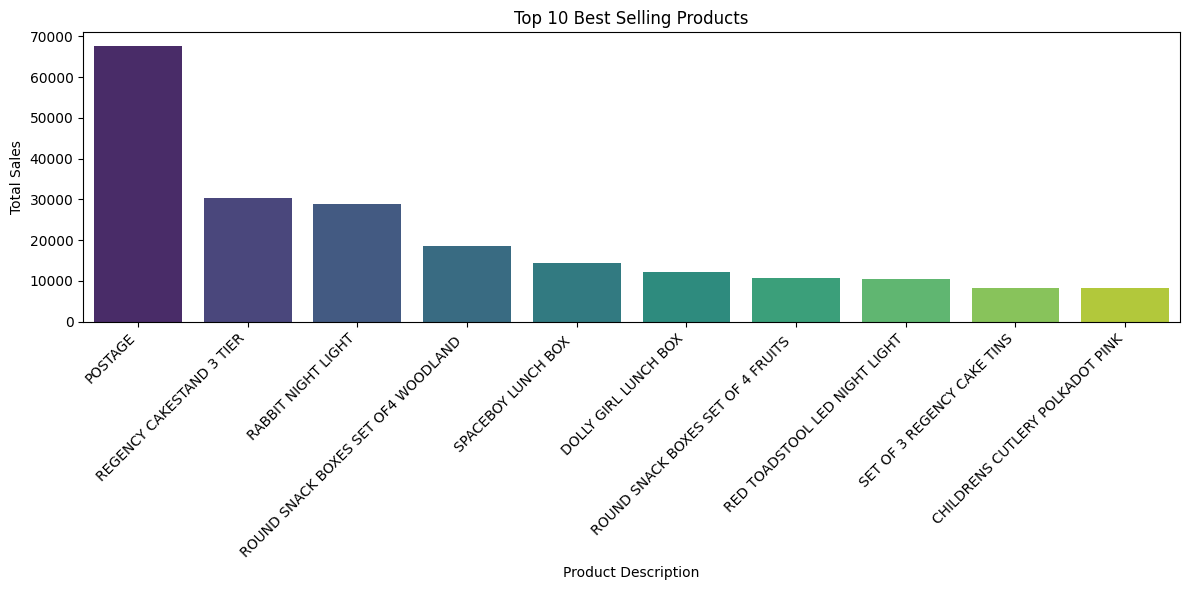

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Description', y='TotalSales', data=toptenbestsales, palette='viridis')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
data2['InvoiceDate'] = pd.to_datetime(data2['InvoiceDate'])
data2['Time'] = data2['InvoiceDate'].dt.time
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Time
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,08:45:00
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,08:45:00
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.0,08:45:00
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.2,08:45:00
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.6,08:45:00


In [53]:
hourlysales = data2.groupby(['InvoiceDate','Time'])['TotalSales'].sum().reset_index()
hourlysales

,InvoiceDate,Time,TotalSales
0,2010-12-01 08:45:00,08:45:00,855.86
1,2010-12-01 10:03:00,10:03:00,358.25
2,2010-12-01 11:27:00,11:27:00,192.60
3,2010-12-01 13:04:00,13:04:00,261.48
4,2010-12-01 13:24:00,13:24:00,1919.14
...,...,...,...
2367,2011-12-09 10:13:00,10:13:00,339.14
2368,2011-12-09 11:59:00,11:59:00,224.95
2369,2011-12-09 12:09:00,12:09:00,277.08
2370,2011-12-09 12:16:00,12:16:00,848.55


## When do customers purchase the most?

/tmp/ipython-input-2350317662.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='TotalSales', data=hourly_total_sales, palette='magma')


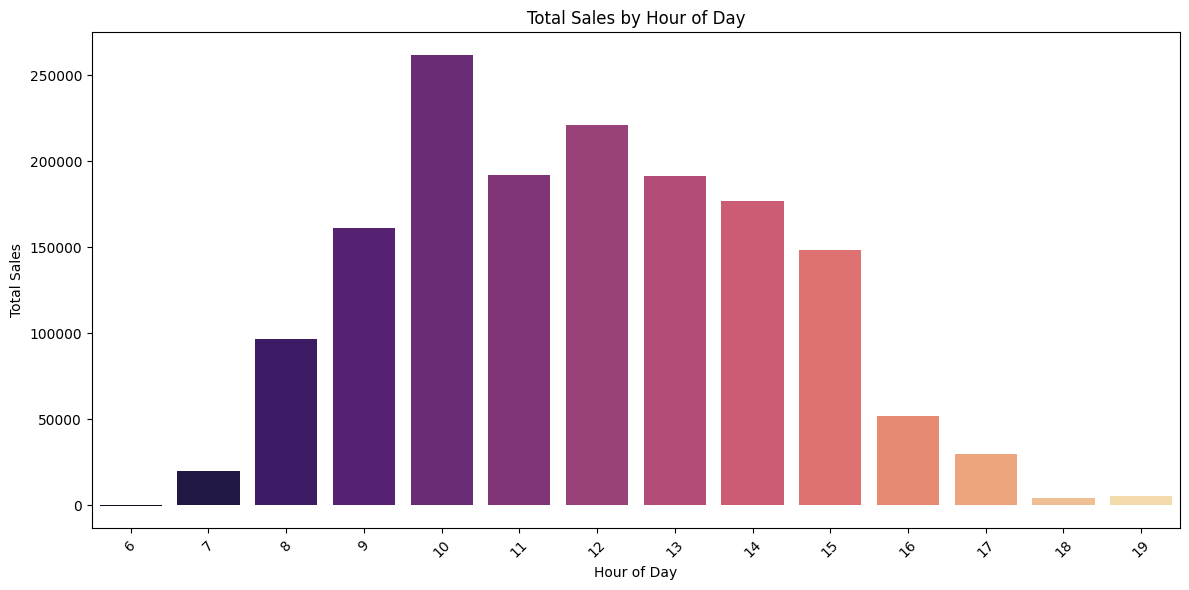

In [54]:
hourlysales['Hour'] = hourlysales['Time'].apply(lambda x: x.hour)
hourly_total_sales = hourlysales.groupby('Hour')['TotalSales'].sum().reset_index()
hourly_avg_sales = hourlysales.groupby('Hour')['TotalSales'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='TotalSales', data=hourly_total_sales, palette='magma')
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Find repeat customers

In [31]:
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Time
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,08:45:00
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,08:45:00
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.0,08:45:00
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.2,08:45:00
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.6,08:45:00


In [37]:
repeatcustomers = data2.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().sort_values(by='InvoiceNo', ascending=False)
repeatcustomers

,CustomerID,InvoiceNo
399,14911.0,248
398,14646.0,77
391,14156.0,66
99,12471.0,49
178,12569.0,35
...,...,...
411,15480.0,1
9,12357.0,1
421,17844.0,1
7,12355.0,1


/tmp/ipython-input-2584853593.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='InvoiceNo', data=top_10_repeat_customers, palette='viridis')


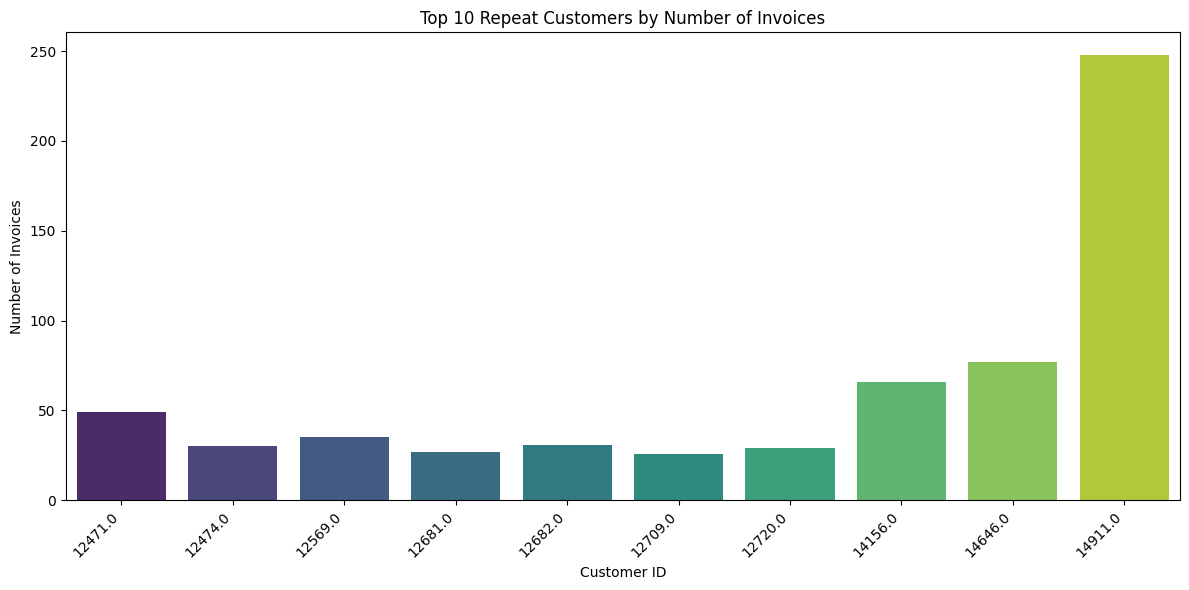

In [38]:
top_10_repeat_customers = repeatcustomers.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerID', y='InvoiceNo', data=top_10_repeat_customers, palette='viridis')
plt.title('Top 10 Repeat Customers by Number of Invoices')
plt.xlabel('Customer ID')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Average order value by day/hour

Daily Average Order Value (First 5 entries):
         Date  TotalSales
0  2010-12-01   25.285597
1  2010-12-02   10.223333
2  2010-12-03   29.502723
3  2010-12-05   25.524784
4  2010-12-06   24.700678


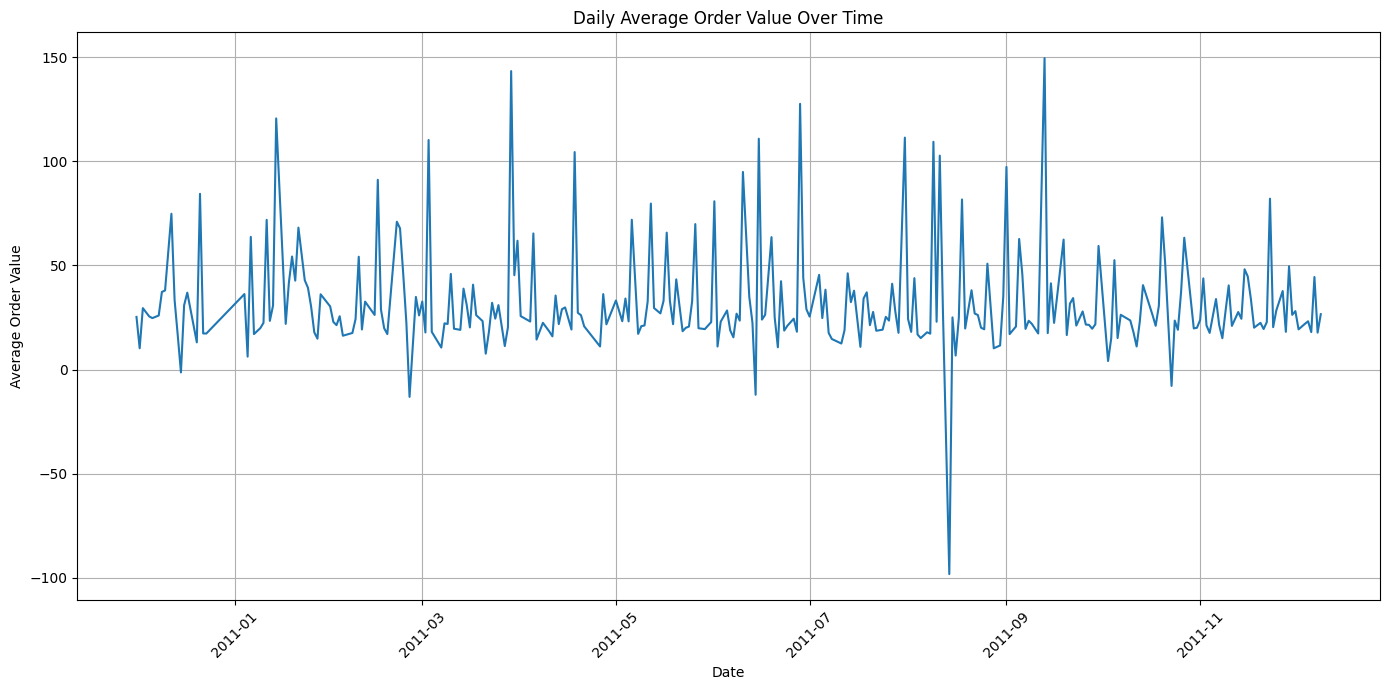

In [47]:
# Calculate daily average order value
daily_avg_order_value = data2.groupby(data2['InvoiceDate'].dt.date)['TotalSales'].mean().reset_index()
daily_avg_order_value.rename(columns={'InvoiceDate': 'Date'}, inplace=True)

# Display the head of the daily average order value DataFrame
print("Daily Average Order Value (First 5 entries):")
print(daily_avg_order_value.head())

# Plotting the daily average order value
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='TotalSales', data=daily_avg_order_value)
plt.title('Daily Average Order Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Hourly Average Order Value (First 5 entries):
   Hour   TotalSales
0     6   -97.523333
1     7  3322.438333
2     8   862.485357
3     9   641.285777
4    10   723.581354


/tmp/ipython-input-1046996774.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='TotalSales', data=hourly_avg_sales, palette='magma')


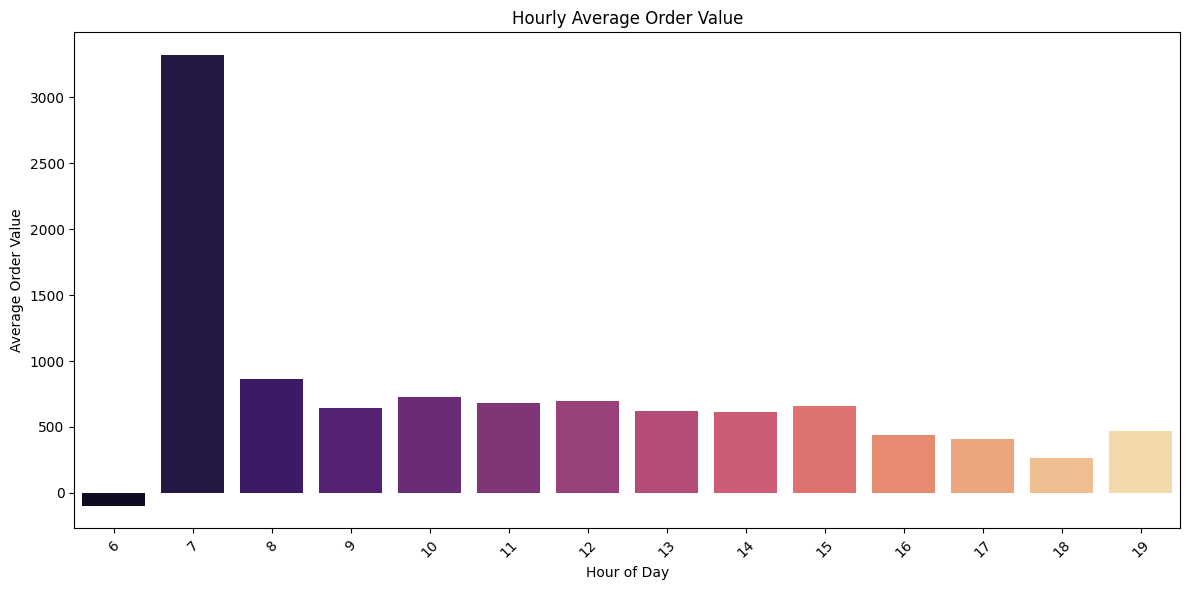

In [58]:
print("Hourly Average Order Value (First 5 entries):")
print(hourly_avg_sales.head())

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='TotalSales', data=hourly_avg_sales, palette='magma')
plt.title('Hourly Average Order Value')
plt.xlabel('Hour of Day')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()